In [1]:
import pandas as pd
import seaborn as sns

In [44]:
df= pd.read_csv("Car_Csv.csv")

Task: Find whetehr a churn can be predicted using the servicing cost of the car
Churn : Rate at which a business looses its customers
Things to do :
1. Find the relation between the Churn of the company and different columns
2. Try to create a model based on the columns corelated to the Churn to predict whether the cutomer will withdraw service or not.


In [45]:
df.head()

,CustomerID,Customer-Age,Gender,Membership,Company,Segment,Model,Car-Year,Car-Age,Fuel type,Servicing-Price,Payment-Method,TechSupport,Assistance,Churn
0,7590-VHVEG,39,Male,Yes,Maruti Suzuki,Sedan,Ciaz,2005,15,Diesel,3500.0,Card,Yes,Yes,Yes
1,5575-GNVDE,55,Male,Yes,Maruti Suzuki,Hatchback,Swift,2006,14,Petrol,3000.0,Cash,Yes,Yes,Yes
2,3668-QPYBK,25,Female,No,Maruti Suzuki,Suv,Breeza,2007,13,Petrol,4500.0,Wallet,Yes,Yes,Yes
3,7795-CFOCW,24,Male,Yes,Maruti Suzuki,Muv,Ertiga,2008,12,Cng,5000.0,Cash,Yes,Yes,Yes
4,9237-HQITU,34,Male,Yes,Maruti Suzuki,Sedan,Dzire,2009,11,Diesel,3500.0,Cash,Yes,Yes,Yes


In [25]:
df.describe()

,Customer-Age,Car-Year,Car-Age,Servicing-Price
count,3000.000000,3000.000000,3000.000000,2971.000000
mean,38.281000,2012.489333,7.510667,3999.663413
std,10.140035,4.610528,4.610528,790.622579
min,21.000000,2005.000000,0.000000,3000.000000
25%,30.000000,2008.000000,4.000000,3250.000000
50%,38.000000,2012.000000,8.000000,3500.000000
75%,47.000000,2016.000000,12.000000,4500.000000
max,55.000000,2020.000000,15.000000,5000.000000


In [26]:
df.dropna(inplace=True,how="any")

In [40]:
df['Gender'] =df['Gender'].astype('category').cat.codes
df['Fuel type'] =df['Fuel type'].astype('category').cat.codes
df['Payment-Method'] =df['Payment-Method'].astype('category').cat.codes
df['TechSupport'] =df['TechSupport'].astype('category').cat.codes
df['Assistance'] =df['Assistance'].astype('category').cat.codes
df['Churn'] =df['Churn'].astype('category').cat.codes
df['Membership'] =df['Membership'].astype('category').cat.codes
df['Model'] =df['Model'].astype('category').cat.codes

<AxesSubplot:>

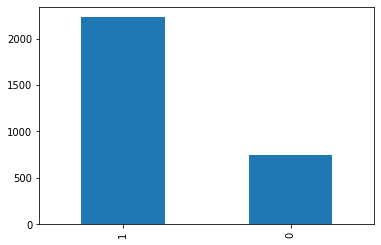

In [41]:
df['Churn'].value_counts().plot.bar()

<AxesSubplot:>

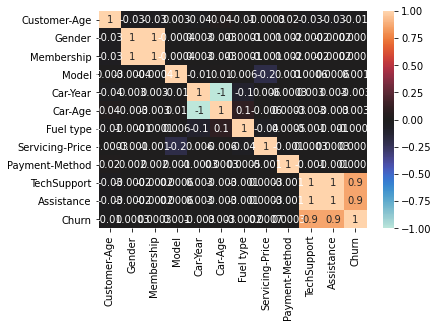

In [42]:
sns.heatmap(df.corr(),annot = True,fmt='.1g', vmin=-1, vmax=1, center= 0)

In [43]:
corr_matrix=df.corr()
print(corr_matrix["Churn"].sort_values(ascending=False))

Churn              1.000000
Assistance         0.865649
TechSupport        0.865649
Car-Age            0.002972
Model              0.001090
Servicing-Price    0.000737
Payment-Method     0.000308
Membership         0.000275
Gender             0.000275
Fuel type         -0.000176
Car-Year          -0.002972
Customer-Age      -0.010468
Name: Churn, dtype: float64


Since Columns : Assistance and TechSupport constitutes of the same values we ca ommit or drop one column

In [46]:
from sklearn.model_selection import train_test_split

In [49]:
X=df[['Assistance',"Servicing-Price"]]  # Features
y=df['Churn']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [51]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

ValueError: could not convert string to float: 'Yes'